In [1]:
import praw
import pandas as pd
import time

In [2]:
reddit = praw.Reddit(
    client_id="J9g7RCXIvtamZFaoF9N-nA",
    client_secret="HaFy0w4fukleppD1nKL_6a1wo3cpiA",
    user_agent="my_reddit_app/0.1"
)

In [3]:
subreddit_name = "StockMarket" 
total_posts = 2000  
output_file = "reddit_stock_posts.csv"  

In [4]:
columns = ["Post ID", "Title", "Author", "Timestamp", "Upvotes", "Comments", "URL"]
all_posts = pd.DataFrame(columns=columns)

In [5]:
try:
    posts_collected = 0
    for submission in reddit.subreddit(subreddit_name).new(limit=total_posts):
        post_data = [
            submission.id,          # Post ID
            submission.title,       # Title of the post
            submission.author.name if submission.author else None,  # Author
            submission.created_utc, # Timestamp
            submission.score,       # Upvotes
            submission.num_comments, # Number of comments
            submission.url          # URL of the post
        ]
        all_posts = pd.concat([all_posts, pd.DataFrame([post_data], columns=columns)], ignore_index=True)
        posts_collected += 1
        print(f"Collected {posts_collected}/{total_posts} posts...")
        all_posts.to_csv(output_file, index=False)
        time.sleep(1)
    print(f"Dataset collection complete. Total posts collected: {posts_collected}")
    print(f"Dataset saved to {output_file}")
except Exception as e:
    print("Error occurred:", str(e))

C:\Users\batha\AppData\Local\Temp\ipykernel_12384\4129361025.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_posts = pd.concat([all_posts, pd.DataFrame([post_data], columns=columns)], ignore_index=True)


Collected 1/2000 posts...
Collected 2/2000 posts...
Collected 3/2000 posts...
Collected 4/2000 posts...
Collected 5/2000 posts...
Collected 6/2000 posts...
Collected 7/2000 posts...
Collected 8/2000 posts...
Collected 9/2000 posts...
Collected 10/2000 posts...
Collected 11/2000 posts...
Collected 12/2000 posts...
Collected 13/2000 posts...
Collected 14/2000 posts...
Collected 15/2000 posts...
Collected 16/2000 posts...
Collected 17/2000 posts...
Collected 18/2000 posts...
Collected 19/2000 posts...
Collected 20/2000 posts...
Collected 21/2000 posts...
Collected 22/2000 posts...
Collected 23/2000 posts...
Collected 24/2000 posts...
Collected 25/2000 posts...
Collected 26/2000 posts...
Collected 27/2000 posts...
Collected 28/2000 posts...
Collected 29/2000 posts...
Collected 30/2000 posts...
Collected 31/2000 posts...
Collected 32/2000 posts...
Collected 33/2000 posts...
Collected 34/2000 posts...
Collected 35/2000 posts...
Collected 36/2000 posts...
Collected 37/2000 posts...
Collected 

In [6]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

data = pd.read_csv("reddit_stock_posts.csv")

# Text preprocessing
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = word_tokenize(text)
    return " ".join([word for word in words if word not in stop_words])

data['cleaned_title'] = data['Title'].apply(preprocess_text)
print(data[['Title', 'cleaned_title']].head())


                                               Title  \
0  Hoping to reach 22k in my portfolio and I’m ou...   
1                      Anyone can help me with this?   
2  If you aren’t having fun in the Yahoo Finance ...   
3  Daily General Discussion and Advice Thread - D...   
4                       $RDDT value makes no sense.    

                                       cleaned_title  
0  hoping reach 22k portfolio ’ out… completing p...  
1                                        anyone help  
2  ’ fun yahoo finance forum ’ truly enjoying sto...  
3  daily general discussion advice thread decembe...  
4                             rddt value makes sense  


In [7]:
from textblob import TextBlob

def sentiment_score(text):
    return TextBlob(text).sentiment.polarity

data['sentiment'] = data['cleaned_title'].apply(sentiment_score)
print(data[['cleaned_title', 'sentiment']].head())

                                       cleaned_title  sentiment
0  hoping reach 22k portfolio ’ out… completing p...   0.000000
1                                        anyone help   0.000000
2  ’ fun yahoo finance forum ’ truly enjoying sto...   0.333333
3  daily general discussion advice thread decembe...   0.025000
4                             rddt value makes sense   0.000000


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Upvotes', 'Comments']] = scaler.fit_transform(data[['Upvotes', 'Comments']])
print(data[['Upvotes', 'Comments']].head())

    Upvotes  Comments
0  0.000000  0.000466
1  0.000092  0.000933
2  0.000553  0.000000
3  0.000184  0.000466
4  0.000000  0.014925


In [26]:
# Load Reddit data
reddit_data = pd.read_csv("reddit_stock_posts_with_features.csv")

# Convert 'Timestamp' to datetime without specifying the unit
reddit_data['Date'] = pd.to_datetime(reddit_data['Timestamp']).dt.date



In [27]:
reddit_data.head()

,Post ID,Title,Author,Timestamp,Upvotes,Comments,URL,Cleaned_Title,Sentiment,Day_of_Week,Hour_of_Day,Weekday_or_Weekend,AAPL_Mention_Count,TSLA_Mention_Count,GOOG_Mention_Count,Date
0,1h2ik60,Daily General Discussion and Advice Thread - N...,AutoModerator,2024-11-29 10:01:01,3,0,https://www.reddit.com/r/StockMarket/comments/...,daily general discussion advice thread novembe...,0.0000,4,10,Weekday,0,0,0,2024-11-29
1,1h2ig8u,Evaluating Solar/Wind Companies – Overwhelmed ...,guesta1104,2024-11-29 09:52:45,1,5,https://www.reddit.com/r/StockMarket/comments/...,evaluating solarwind companies overwhelmed kpis,0.0516,4,9,Weekday,0,0,0,2024-11-29
2,1h24jw1,Investing in AI infrastructure?,Typical-Ad-4591,2024-11-28 20:07:41,4,15,https://www.reddit.com/r/StockMarket/comments/...,investing ai infrastructure,0.0000,3,20,Weekday,0,0,0,2024-11-28
3,1h22y12,Gold Prices Tempt Eastern Europe Central Banks...,PrestigiousCat969,2024-11-28 18:52:32,20,0,https://www.bloomberg.com/news/articles/2024-1...,gold prices tempt eastern europe central banks...,0.0000,3,18,Weekday,0,0,0,2024-11-28
4,1h1spsw,Daily General Discussion and Advice Thread - N...,AutoModerator,2024-11-28 10:00:56,0,1,https://www.reddit.com/r/StockMarket/comments/...,daily general discussion advice thread novembe...,0.0000,3,10,Weekday,0,0,0,2024-11-28


In [28]:
reddit_data.shape

(866, 16)

In [29]:
reddit_data.size

13856

In [32]:
# Convert Timestamp to datetime
reddit_data['Timestamp'] = pd.to_datetime(reddit_data['Timestamp'])
reddit_data['Date'] = reddit_data['Timestamp'].dt.date
reddit_data['Hour_of_Day'] = reddit_data['Timestamp'].dt.hour
reddit_data['Day_of_Week'] = reddit_data['Timestamp'].dt.dayofweek  # Monday=0, Sunday=6
reddit_data['Weekday_or_Weekend'] = reddit_data['Day_of_Week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

In [33]:
# Display data after preprocessing Timestamp
print("\nDataset after Preprocessing Timestamp:")
print(reddit_data[['Timestamp', 'Date', 'Hour_of_Day', 'Day_of_Week', 'Weekday_or_Weekend']].head())


Dataset after Preprocessing Timestamp:
            Timestamp        Date  Hour_of_Day  Day_of_Week Weekday_or_Weekend
0 2024-11-29 10:01:01  2024-11-29           10            4            Weekday
1 2024-11-29 09:52:45  2024-11-29            9            4            Weekday
2 2024-11-28 20:07:41  2024-11-28           20            3            Weekday
3 2024-11-28 18:52:32  2024-11-28           18            3            Weekday
4 2024-11-28 10:00:56  2024-11-28           10            3            Weekday


In [40]:
# Inspect sentiment values
print(reddit_data['Sentiment'].unique())

# Define a function to label stock movement based on sentiment and engagement (upvotes/comments)
def determine_movement(row):
    if row['Sentiment'] > 0.1 and (row['Upvotes'] > 10 or row['Comments'] > 5):
        return 'Up'
    elif row['Sentiment'] < -0.1:
        return 'Down'
    else:
        return 'No Change'

# Apply the function to create the 'Stock_Movement' target variable
reddit_data['Stock_Movement'] = reddit_data.apply(determine_movement, axis=1)

# Display the first few rows to confirm the new target variable
print(reddit_data[['Title', 'Sentiment', 'Upvotes', 'Comments', 'Stock_Movement']].head())


[ 0.      0.0516 -0.1027 -0.7717  0.5423  0.5859  0.7351 -0.5423  0.2732
  0.765   0.2263  0.6369  0.5267  0.4404  0.0772  0.4767 -0.8299  0.4215
  0.2023 -0.6249 -0.296   0.128   0.3818 -0.2263  0.7269  0.4019  0.8176
 -0.34    0.5994  0.7845  0.5719 -0.5095  0.872  -0.2732 -0.7003  0.3612
 -0.743   0.34    0.6124  0.1461  0.6784  0.6597 -0.5267  0.6908  0.7906
  0.296  -0.3182 -0.3818 -0.1531  0.1531  0.8591  0.6486  0.6705 -0.3612
  0.0258 -0.4019 -0.4767 -0.4215  0.4588  0.8481 -0.5574  0.836   0.4939
  0.3182  0.1779 -0.5106  0.7783  0.5106  0.7501 -0.6705  0.6249 -0.25
  0.2567  0.7003 -0.5859 -0.128   0.875  -0.4404  0.25   -0.1263 -0.6486
  0.1027 -0.6808 -0.0772 -0.6908  0.5574 -0.2023  0.8126 -0.7096 -0.7351]
                                               Title  Sentiment  Upvotes  \
0  Daily General Discussion and Advice Thread - N...     0.0000        3   
1  Evaluating Solar/Wind Companies – Overwhelmed ...     0.0516        1   
2                    Investing in AI infras

In [42]:
# Check if the columns contain only 0 values
stock_columns = ['AAPL_Mention_Count', 'TSLA_Mention_Count', 'GOOG_Mention_Count']
for col in stock_columns:
    if reddit_data[col].nunique() == 1 and reddit_data[col].iloc[0] == 0:
        print(f"Column {col} contains only 0 values.")

Column AAPL_Mention_Count contains only 0 values.
Column TSLA_Mention_Count contains only 0 values.
Column GOOG_Mention_Count contains only 0 values.


In [43]:
reddit_data.drop(columns=stock_columns, inplace=True, errors='ignore')

In [45]:
print(reddit_data.columns)

Index(['Post ID', 'Title', 'Author', 'Timestamp', 'Upvotes', 'Comments', 'URL',
       'Cleaned_Title', 'Sentiment', 'Day_of_Week', 'Hour_of_Day',
       'Weekday_or_Weekend', 'Date', 'Stock_Movement'],
      dtype='object')


In [46]:
# Inspect sentiment values
print(reddit_data['Sentiment'].unique())

# Define a function to label stock movement based on sentiment and engagement (upvotes/comments)
def determine_movement(row):
    if row['Sentiment'] > 0.1 and (row['Upvotes'] > 10 or row['Comments'] > 5):
        return 'Up'
    elif row['Sentiment'] < -0.1:
        return 'Down'
    else:
        return 'No Change'

# Apply the function to create the 'Stock_Movement' target variable
reddit_data['Stock_Movement'] = reddit_data.apply(determine_movement, axis=1)

# Display the first few rows to confirm the new target variable
print(reddit_data[['Title', 'Sentiment', 'Upvotes', 'Comments', 'Stock_Movement']].head())


[ 0.      0.0516 -0.1027 -0.7717  0.5423  0.5859  0.7351 -0.5423  0.2732
  0.765   0.2263  0.6369  0.5267  0.4404  0.0772  0.4767 -0.8299  0.4215
  0.2023 -0.6249 -0.296   0.128   0.3818 -0.2263  0.7269  0.4019  0.8176
 -0.34    0.5994  0.7845  0.5719 -0.5095  0.872  -0.2732 -0.7003  0.3612
 -0.743   0.34    0.6124  0.1461  0.6784  0.6597 -0.5267  0.6908  0.7906
  0.296  -0.3182 -0.3818 -0.1531  0.1531  0.8591  0.6486  0.6705 -0.3612
  0.0258 -0.4019 -0.4767 -0.4215  0.4588  0.8481 -0.5574  0.836   0.4939
  0.3182  0.1779 -0.5106  0.7783  0.5106  0.7501 -0.6705  0.6249 -0.25
  0.2567  0.7003 -0.5859 -0.128   0.875  -0.4404  0.25   -0.1263 -0.6486
  0.1027 -0.6808 -0.0772 -0.6908  0.5574 -0.2023  0.8126 -0.7096 -0.7351]
                                               Title  Sentiment  Upvotes  \
0  Daily General Discussion and Advice Thread - N...     0.0000        3   
1  Evaluating Solar/Wind Companies – Overwhelmed ...     0.0516        1   
2                    Investing in AI infras

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

# Fill NaN values in 'Cleaned_Title' with an empty string
reddit_data['Cleaned_Title'] = reddit_data['Cleaned_Title'].fillna('')

# Initialize a vectorizer to convert text data into numerical format (Bag of Words)
vectorizer = CountVectorizer(stop_words='english')

# Convert the 'Cleaned_Title' text into feature vectors
X_text = vectorizer.fit_transform(reddit_data['Cleaned_Title'])

# Display the feature matrix
print("Feature Matrix (first 5 rows):")
print(X_text.toarray()[:5, :])  # Preview the first 5 rows

# Display the feature names
print("Feature Names (first 10):", vectorizer.get_feature_names_out()[:10])



Feature Matrix (first 5 rows):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Feature Names (first 10): ['01' '02' '03' '035' '04' '05' '06' '07' '08' '09']


In [49]:
from sklearn.preprocessing import StandardScaler

# Prepare numerical features (Sentiment, Upvotes, Comments)
X_numeric = reddit_data[['Sentiment', 'Upvotes', 'Comments']]

# Normalize the numerical features (important for models like SVM)
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

# Combine text features with numerical features (concatenate along columns)
import scipy.sparse

X = scipy.sparse.hstack([X_text, X_numeric_scaled])

# Display the combined feature matrix
print(X.shape)


(866, 2020)


In [52]:
reddit_data['Stock_Movement'].value_counts()

Stock_Movement
No Change    614
Up           166
Down          86
Name: count, dtype: int64

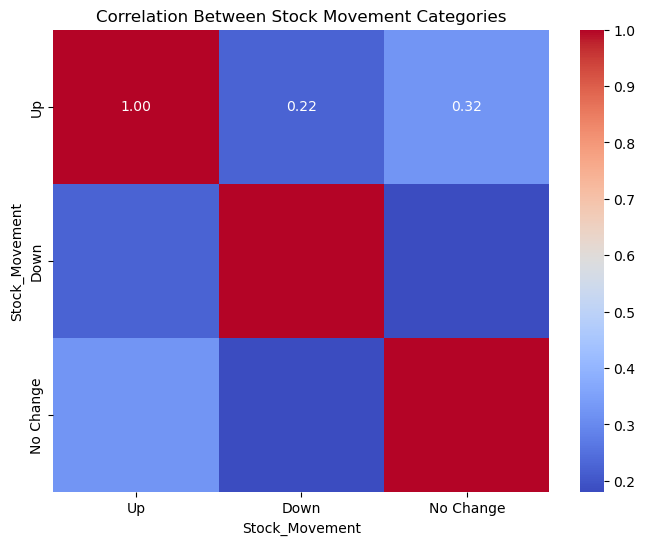

In [83]:
# Calculate correlation between movement categories
correlation_matrix = time_series_data[['Up', 'Down', 'No Change']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Stock Movement Categories")
plt.show()


In [76]:
# Resample data to daily frequency to count stock movements
time_series_data = reddit_data.groupby(['Date', 'Stock_Movement']).size().unstack(fill_value=0)

# Display the resampled data
print(time_series_data.head())


Stock_Movement  Down  No Change  Up
Date                               
2024-08-21         1         13   1
2024-08-22         2          8   2
2024-08-23         1          7   2
2024-08-24         0          2   4
2024-08-25         0          4   0


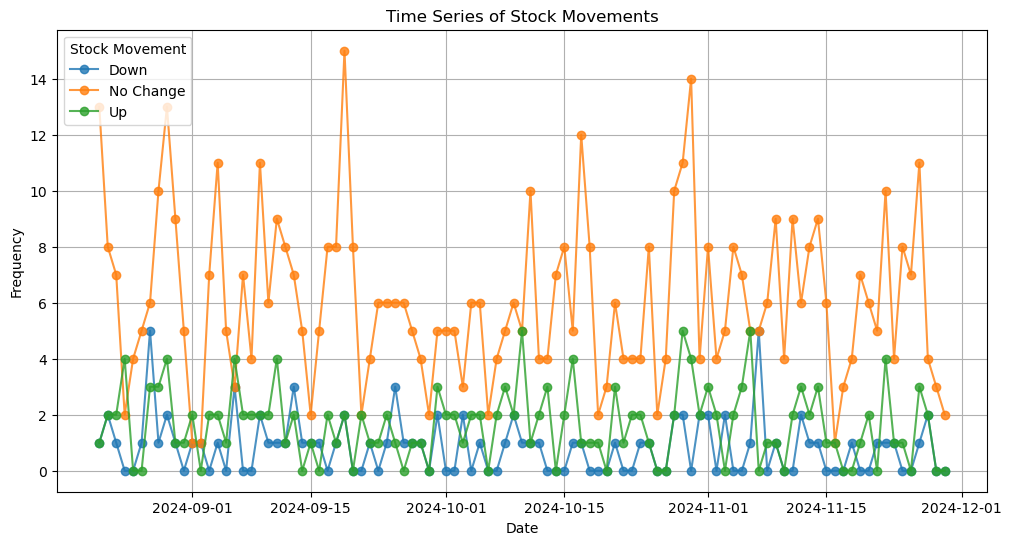

In [78]:
# Plot the time series of stock movements
plt.figure(figsize=(12, 6))
time_series_data.plot(ax=plt.gca(), marker='o', alpha=0.8)
plt.title("Time Series of Stock Movements")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.legend(title="Stock Movement", loc="upper left")
plt.grid(True)
plt.show()


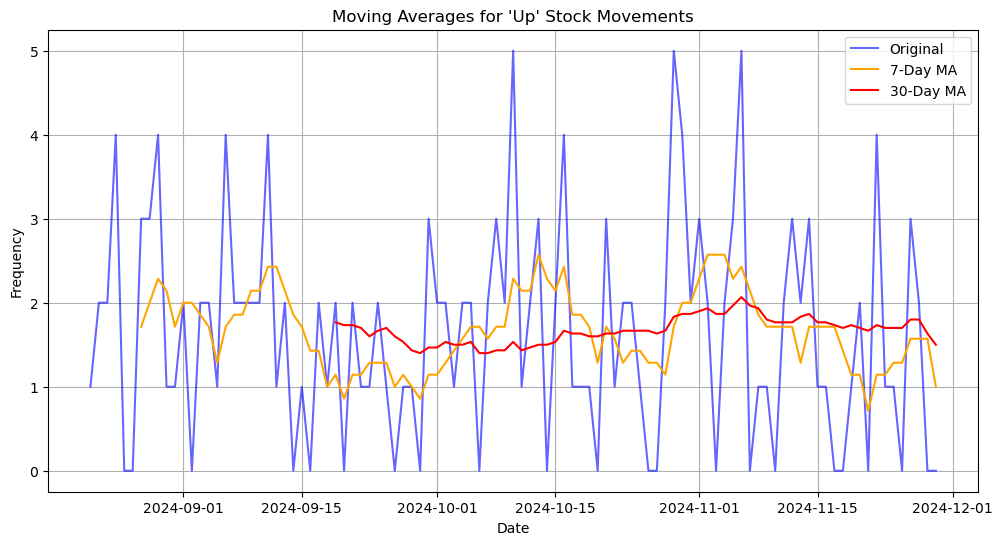

In [84]:
# Calculate 7-day and 30-day moving averages
time_series_data['Up_7D_MA'] = time_series_data['Up'].rolling(window=7).mean()
time_series_data['Up_30D_MA'] = time_series_data['Up'].rolling(window=30).mean()

# Plot original data with moving averages
plt.figure(figsize=(12, 6))
plt.plot(time_series_data.index, time_series_data['Up'], label='Original', color='blue', alpha=0.6)
plt.plot(time_series_data.index, time_series_data['Up_7D_MA'], label='7-Day MA', color='orange')
plt.plot(time_series_data.index, time_series_data['Up_30D_MA'], label='30-Day MA', color='red')
plt.title("Moving Averages for 'Up' Stock Movements")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [55]:
# Define target variable (y)
y = reddit_data['Stock_Movement']

In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
# Initialize and train the model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [58]:
# Predict on the test set
y_pred = model.predict(X_test)

In [60]:
acc = model.score(X_test, y_test)
print(f"Accuracy = {acc*100:.2f}%")

Accuracy = 96.92%


In [61]:
# Display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Down       1.00      0.82      0.90        22
   No Change       0.96      0.99      0.98       190
          Up       0.98      0.94      0.96        48

    accuracy                           0.97       260
   macro avg       0.98      0.92      0.95       260
weighted avg       0.97      0.97      0.97       260



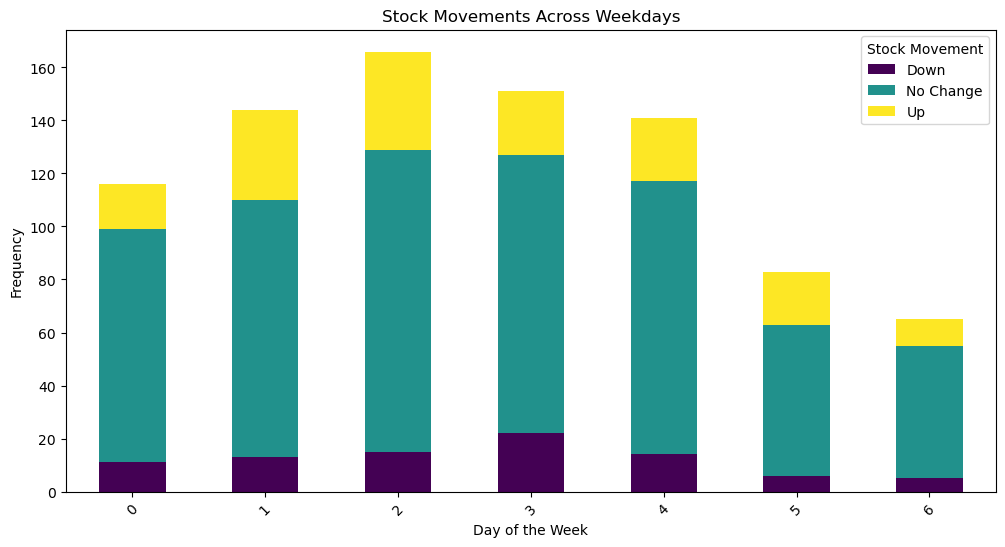

In [75]:
# Group data by Weekday and Stock Movement
weekday_movement = reddit_data.groupby(['Day_of_Week', 'Stock_Movement']).size().unstack(fill_value=0)

# Plot a stacked bar chart
weekday_movement.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='viridis')
plt.title("Stock Movements Across Weekdays")
plt.xlabel("Day of the Week")
plt.ylabel("Frequency")
plt.legend(title="Stock Movement")
plt.xticks(rotation=45)
plt.show()


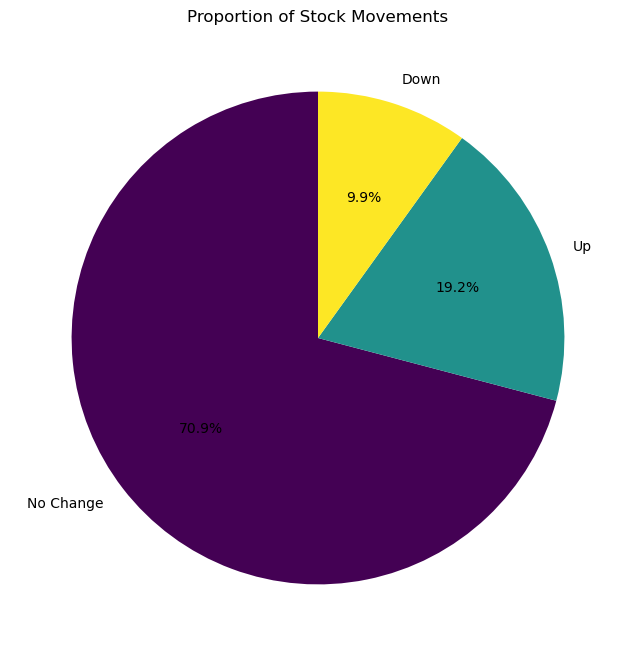

In [72]:
# Plot a pie chart
plt.figure(figsize=(8, 8))
movement_counts.plot(kind='pie', autopct='%1.1f%%', cmap='viridis', startangle=90)
plt.title("Proportion of Stock Movements")
plt.ylabel("")  # Hide y-label
plt.show()


In [85]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target variable
features = reddit_data[['Sentiment', 'Upvotes', 'Comments']]  # Adjust based on available numeric features
target = reddit_data['Stock_Movement']

# Encode the target variable (Up: 2, Down: 1, No Change: 0)
encoder = LabelEncoder()
target_encoded = encoder.fit_transform(target)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.2, random_state=42)

# Display shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (692, 3)
X_test shape: (174, 3)
y_train shape: (692,)
y_test shape: (174,)


In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
# Initialize and train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [88]:
# Make predictions
logistic_preds = logistic_model.predict(X_test)


In [91]:
acc_lr = logistic_model.score(X_test, y_test)
print(f"Accuracy of logistic regression {acc_lr*100:.2f}%")

Accuracy of logistic regression 86.21%


In [89]:
# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_preds, target_names=encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, logistic_preds))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

        Down       1.00      0.71      0.83        17
   No Change       0.88      0.93      0.90       123
          Up       0.73      0.71      0.72        34

    accuracy                           0.86       174
   macro avg       0.87      0.78      0.82       174
weighted avg       0.86      0.86      0.86       174

Confusion Matrix:
[[ 12   5   0]
 [  0 114   9]
 [  0  10  24]]


In [94]:
from xgboost import XGBClassifier

In [98]:
xgb_model = XGBClassifier(
    max_depth=3,                # Limit tree depth
    learning_rate=0.1,          # Lower learning rate
    n_estimators=100,           # Fewer trees
    min_child_weight=5,         # Increase minimum child weight
    gamma=1,                    # Require a higher reduction in loss to split
    reg_alpha=0.1,              # Add L1 regularization
    reg_lambda=1,               # Add L2 regularization
    subsample=0.8,              # Use a subset of samples for training
    colsample_bytree=0.8,       # Use a subset of features for each tree
    use_label_encoder=False,    # Disable label encoder warning
    eval_metric='mlogloss',     # Evaluation metric for multi-class classification
    random_state=42
)
xgb_model.fit(X_train, y_train)

C:\Users\batha\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:04:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [99]:
# Make predictions
xgb_preds = xgb_model.predict(X_test)

In [100]:
# Evaluate the model
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_preds, target_names=encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_preds))

XGBoost Classification Report:
              precision    recall  f1-score   support

        Down       1.00      1.00      1.00        17
   No Change       1.00      1.00      1.00       123
          Up       1.00      1.00      1.00        34

    accuracy                           1.00       174
   macro avg       1.00      1.00      1.00       174
weighted avg       1.00      1.00      1.00       174

Confusion Matrix:
[[ 17   0   0]
 [  0 123   0]
 [  0   0  34]]


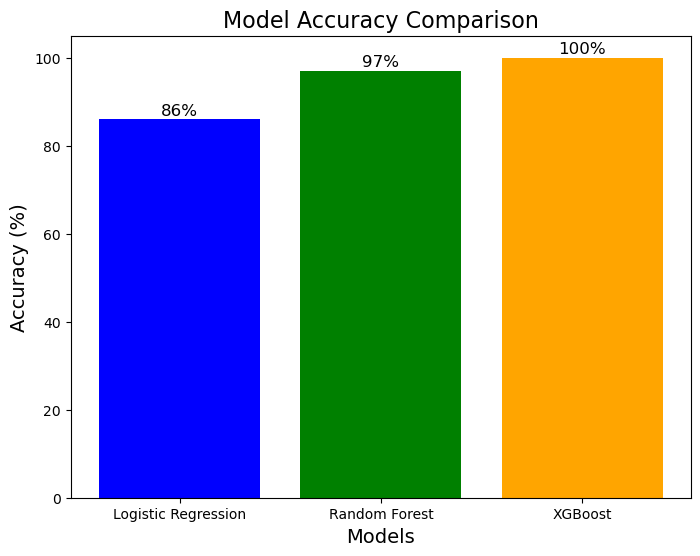

In [105]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [86, 97, 100]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])

# Add titles and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)

# Display the accuracy values on top of each bar
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 1, f'{accuracy}%', ha='center', fontsize=12)

# Show the plot
plt.show()
